# EDAV and File Extraction

Q. Why is the user review count different than the actual number of reviews returned for that user?

The review count represents the total number of reviews a user had posted at the time of data collection, whether Yelp recommended them or not. As for the reviews, only the reviews that were recommended at the time of data collection are included. Also, we only include businesses that have had at least 3 reviews older than 14 days. So the review count number may differ from the number of actual reviews for any given user.

Q. Which reviews are included in the reviews files?

Only the reviews that Yelp recommended at the time of data collection are included.

FAQ: https://www.yelp.com/dataset/documentation/faq

Data reference: https://www.yelp.com/dataset/documentation/main

In [1]:
# import references

import pandas as pd
import json
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl

In [2]:
# review extraction 

line_count = len(open("data/review.json", encoding="utf8").readlines())
rating_ids, user_ids, business_ids, stars, dates, props = [], [], [], [], [], []
with open("data/review.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        rating_ids += [blob["review_id"]]
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        props += [blob["useful"] + blob["funny"] + blob["cool"]]
        
ratings = pd.DataFrame({"review_id": rating_ids, "user_id": user_ids, "business_id": business_ids, 
                        "rating": stars, "date": dates, "props": props})


100%|████████████████████████████████████████████████████████████████████| 6685900/6685900 [00:49<00:00, 134561.50it/s]


In [3]:
ratings.head()

,review_id,user_id,business_id,rating,date,props
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36,7
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33,0
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03,3
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38,0
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38,7


In [4]:
# business extraction

line_count = len(open("data/business.json", encoding="utf8").readlines())
business_ids, state, stars, review_count, is_open, attributes, categories, city, postal_code = [], [], [], [], [], [], [], [], []
with open("data/business.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        city += [blob["city"]]
        state += [blob["state"]]
        postal_code += [blob["postal_code"]]
        stars += [blob["stars"]]
        review_count += [blob["review_count"]]
        is_open += [blob["is_open"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
        
businesses = pd.DataFrame({"business_id": business_ids, "city": city, "state": state, "postal_code": postal_code, 
                           "rating": stars, "review_count": review_count, "is_open": is_open, "attributes": attributes,
                           "categories": categories})

100%|███████████████████████████████████████████████████████████████████████| 192609/192609 [00:02<00:00, 73042.36it/s]


In [5]:
businesses.head()

,business_id,city,state,postal_code,rating,review_count,is_open,attributes,categories
0,1SWheh84yJXfytovILXOAQ,Phoenix,AZ,85016,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,ON,L5R 3E7,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,NC,28210,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Goodyear,AZ,85338,5.0,3,1,None,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Charlotte,NC,28217,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [6]:
# user extraction

line_count = len(open("data/user.json", encoding="utf8").readlines())
user_ids, review_counts, yelping_since, sent_props, fans, elite, average_stars, compliments = [], [], [], [], [], [], [], []
with open("data/user.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        review_counts += [blob["review_count"]]
        yelping_since += [blob["yelping_since"]]
        sent_props += [blob["useful"] + blob["funny"] + blob["cool"]]
        fans += [blob["fans"]]
        elite += [blob["elite"]]
        average_stars += [blob["average_stars"]]
        compliments += [blob["compliment_hot"] + blob["compliment_more"] + \
                       blob["compliment_profile"] + blob["compliment_cute"] + \
                       blob["compliment_list"] + blob["compliment_note"] + \
                       blob["compliment_plain"] + blob["compliment_cool"] + \
                       blob["compliment_funny"] + blob["compliment_writer"] + \
                       blob["compliment_photos"]]
        
users = pd.DataFrame({"user_id": user_ids, "review_counts": review_counts, "yelping_since": yelping_since, 
                           "sent_props": sent_props, "fans": fans, "elite": elite,
                           "average_stars": average_stars, "compliments": compliments}) 

100%|█████████████████████████████████████████████████████████████████████| 1637138/1637138 [00:20<00:00, 78541.47it/s]


In [7]:
users.head()

,user_id,review_counts,yelping_since,sent_props,fans,elite,average_stars,compliments
0,l6BmjZMeQD3rDxWUbiAiow,95,2013-10-08 23:11:33,126,5,"2015,2016,2017",4.03,8
1,4XChL029mKr5hydo79Ljxg,33,2013-02-21 22:29:06,86,4,,3.63,3
2,bc8C_eETBWL0olvFSJJd0w,16,2013-10-04 00:16:10,46,0,,3.71,1
3,dD0gZpBctWGdWo9WlGuhlA,17,2014-05-22 15:57:30,48,5,,4.85,4
4,MM4RJAeH6yuaN8oZDSt0RA,361,2013-10-23 07:02:50,2058,39,"2015,2016,2017,2018",4.08,293


## Sampling Routine

In [8]:
len(ratings) # recommended ratings

6685900

In [9]:
us_restaurant_mask = (businesses.postal_code.str.len() == 5) & businesses.categories.str.contains('Restaurants')
restaurants = businesses[us_restaurant_mask]
restaurant_ratings = ratings.loc[ratings.business_id.isin(restaurants.business_id)]
restaurant_counts = restaurant_ratings["business_id"].value_counts()
active_restaurants = restaurant_counts.loc[restaurant_counts >= 5].index.tolist() 
active_restaurant_ratings = restaurant_ratings[restaurant_ratings.business_id.isin(active_restaurants)]

In [10]:
len(restaurant_ratings)

3424899

In [11]:
len(restaurants)

35828

In [12]:
len(active_restaurants)

32531

In [13]:
user_counts = active_restaurant_ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()
active_filtered_ratings = active_restaurant_ratings[active_restaurant_ratings.user_id.isin(active_users)]

In [14]:
len(active_restaurant_ratings)

3413590

In [15]:
len(active_filtered_ratings)

2099295

In [16]:
# extract a holdout rating from most recent rating

y = active_filtered_ratings.sort_values('date').groupby('user_id').tail(1)
X = active_filtered_ratings.loc[~active_filtered_ratings.review_id.isin(y.review_id)]

In [18]:
len(y)

147753

In [19]:
y.head()

,review_id,user_id,business_id,rating,date,props
9781,yrySUMtAqwKUQ6eqLWX5PA,7VjGynQ1oCHZlytlm23Tgg,50NTSGbZ3pN5643_K1IReA,4.0,2005-05-17 00:45:12,2
6035313,sMwaexsG18eq5bW5WihsRA,c8qFkI_VusWo0xZvkjfBWQ,jxNdYI9sQmTkqfpTsmhGtg,3.0,2005-05-26 07:19:53,2
672514,j8NgHYhqe0GlJfIvqvKnKA,nZcvhWmyQ73TiFDxyGmuAQ,UydVmlfxab6O-CSnjeGZRw,4.0,2005-07-18 18:01:29,2
6064731,Z38q7MEl1Yiioxc--RkZVg,aIk07jxkia9izLMKRbaHHw,_5UAFrD3EDgJO1aZgRxH7w,5.0,2005-09-07 01:36:05,5
5368708,3ltm7UQ2SUlfym_ODhrMLg,gZ-CewXerXlytUGV-4nFRA,GHS1rVjO-RMcRB6WJLpCDQ,4.0,2005-09-12 13:58:56,0


In [20]:
active_filtered_ratings.loc[active_filtered_ratings.user_id =='7VjGynQ1oCHZlytlm23Tgg'] # test

,review_id,user_id,business_id,rating,date,props
9781,yrySUMtAqwKUQ6eqLWX5PA,7VjGynQ1oCHZlytlm23Tgg,50NTSGbZ3pN5643_K1IReA,4.0,2005-05-17 00:45:12,2
1338725,Nq6IDrsjcwAZTB0SPp7K9A,7VjGynQ1oCHZlytlm23Tgg,BVYvfJiVcQTl9B311z518w,5.0,2005-04-15 02:20:57,0
1339659,Z76gsHaX5Ld5SXOwu9NSAA,7VjGynQ1oCHZlytlm23Tgg,cI7k9zqs_pl3byUDE4cpdA,4.0,2005-04-08 04:35:49,3
5350733,NB4E9LQKJxo0SPnWV6taCQ,7VjGynQ1oCHZlytlm23Tgg,pSQFynH1VxkfSmehRXlZWw,5.0,2005-03-08 22:19:43,3
5351031,dDr-sU4GsDqsZc8ehSjvyA,7VjGynQ1oCHZlytlm23Tgg,MqYYYNA-ZYvV-1w5qcmMoA,5.0,2005-03-09 04:04:25,0


C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


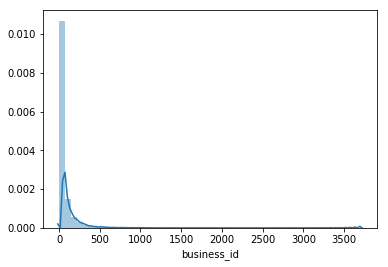

In [22]:
sns.distplot(X.business_id.value_counts());

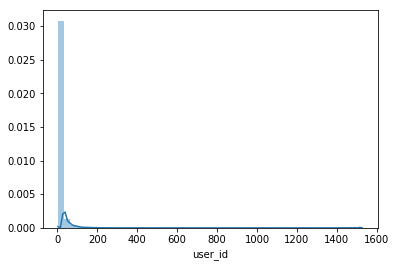

In [23]:
sns.distplot(X.user_id.value_counts());

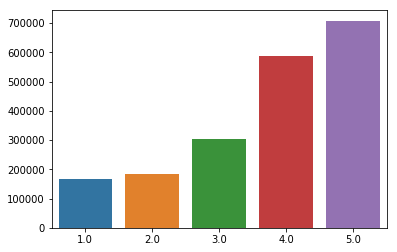

In [24]:
rating_cnt = X.rating.value_counts()
sns.barplot(rating_cnt.index, rating_cnt.values);

In [27]:
len(X)

1951542

In [28]:
# filter business and user mappings for what we have in ratings set
businesses_filtered = businesses[businesses.business_id.isin(X.business_id)]
users_filtered = users[users.user_id.isin(X.user_id)]

In [29]:
# save businesses metadata
pkl.dump(businesses_filtered, open("businesses.pkl", "wb"))

In [30]:
# save users metadata
pkl.dump(users_filtered, open("users.pkl", "wb"))

In [31]:
# save X Y
pkl.dump(X, open("X.pkl", "wb"))
pkl.dump(y, open("y.pkl", "wb"))